Heart Disease UCI

Attribute Information:

1. age

2. sex

3. chest pain type (4 values)

4. resting blood pressure 

5. serum cholestoral in mg/dl

6. fasting blood sugar > 120 mg/dl

7. resting electrocardiographic results (values 0,1,2) 

8. maximum heart rate achieved

9. exercise induced angina 

10. oldpeak = ST depression induced by exercise relative to rest 

11. the slope of the peak exercise ST segment 

12. number of major vessels (0-3) colored by flourosopy 

13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

The names and social security numbers of the patients were recently removed from the database, replaced with dummy values. One file has been "processed", that one containing the Cleveland database. All four unprocessed files also exist in this directory.

To see Test Costs (donated by Peter Turney), please see the folder "Costs"

URL: https://www.kaggle.com/ronitf/heart-disease-uci

참고풀이1: https://ggodong.tistory.com/8

참고풀이2: https://bioinformaticsandme.tistory.com/262

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

heart=pd.read_csv('C:/Users/sundooedu/Desktop/빅데이터분석수업자료/heart disease/heart.csv')

In [2]:
df_heart=pd.DataFrame(heart)

In [3]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
oldpeak=pd.Series(df_heart['oldpeak'], dtype=int)
df_heart['oldpeak']=oldpeak
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       303 non-null    int64
 1   sex       303 non-null    int64
 2   cp        303 non-null    int64
 3   trestbps  303 non-null    int64
 4   chol      303 non-null    int64
 5   fbs       303 non-null    int64
 6   restecg   303 non-null    int64
 7   thalach   303 non-null    int64
 8   exang     303 non-null    int64
 9   oldpeak   303 non-null    int32
 10  slope     303 non-null    int64
 11  ca        303 non-null    int64
 12  thal      303 non-null    int64
 13  target    303 non-null    int64
dtypes: int32(1), int64(13)
memory usage: 32.1 KB


In [5]:
df_heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1,1,1,3,0


- age: 나이
- sex: 1: 남성, 0: 여성
- cp: 가슴 통증 유형(0~4)
- trestbps: 안정 혈압
- chol: 혈청 콜레스테롤(mg/dl)
- fbs: 공복 혈당 > 120mg/dl (1 == true, 0 == false)
- restecg: 안정 심전도 결과(0,1,2)
- thalach: 최대 심박동 수
- exang: 협심증 유발 운동 (1==yes, 0== no)
- oldpeak: 비교적 안정되기까지 운동으로 유발되는 ST depression
- slope: 최대 운동 ST segmant의 기울기
- ca: 형광 투시된 주요 혈관 개수(0~3)
- thal
- target: 심장병 진단(1 == true, 0 == false)

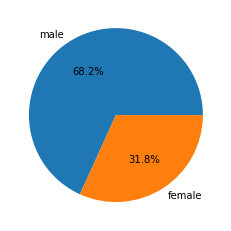

In [6]:
# 전체 성별 비율
import matplotlib.pyplot as plt

sex=len(df_heart.sex)
male=len(df_heart[df_heart.sex==1].value_counts())
female=len(df_heart[df_heart.sex==0].value_counts())

male_ratio=male/sex*100
female_ratio=female/sex*100

sex_ratio=[male_ratio, female_ratio]
labels=['male','female']

plt.pie(sex_ratio, labels=labels, autopct='%.1f%%')
plt.show()

<AxesSubplot:xlabel='age', ylabel='Density'>

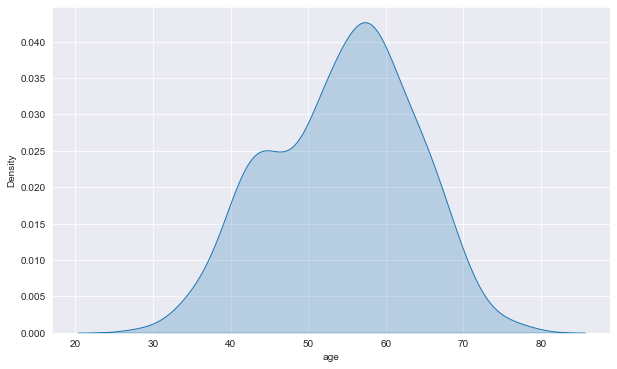

In [7]:
# 연령별 분포도
import seaborn as sns
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
sns.kdeplot(data=df_heart['age'], shade=True)

연령대 별로 성별 보기
- 0: 여성 1: 남성

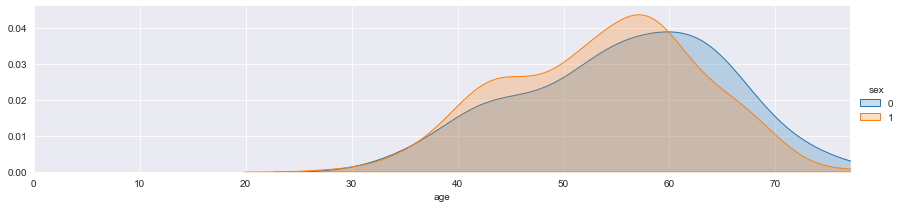

In [8]:
facet = sns.FacetGrid(df_heart, hue ='sex', aspect=4)
facet.map(sns.kdeplot,'age',shade = True) # kde : 이차원 밀집도 그래프
facet.set(xlim=(0,df_heart['age'].max()))
facet.add_legend()
sns.axes_style('dark')

plt.show()

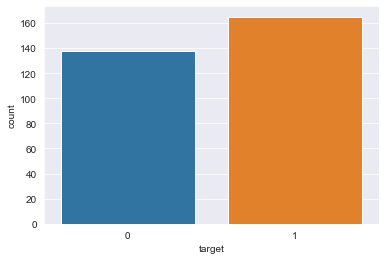

In [9]:
# 심장병 진단 받은 환자 수 보기
sns.countplot(df_heart.target)
plt.show()

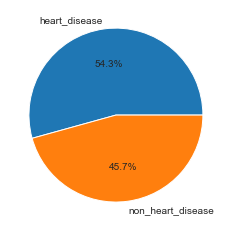

In [10]:
# 심장병 진단 비율
import matplotlib.pyplot as plt

target=len(df_heart.target)
heart_disease=len(df_heart[df_heart.target==1].value_counts())
non_heart_disease=len(df_heart[df_heart.target==0].value_counts())

heart_disease_ratio=heart_disease/target*100
non_heart_disease_ratio=non_heart_disease/target*100

target_ratio=[heart_disease_ratio, non_heart_disease_ratio]
labels=['heart_disease','non_heart_disease']

plt.pie(target_ratio, labels=labels, autopct='%.1f%%')
plt.show()

- 심장병 진단 받은 사람이 그렇지 않은 사람보다 많음을 알 수 있다.

각 특성에 따른 심장병 진단 받은 사람 비율 보기
--

- 0: 심장병이 아님
- 1: 심장병이 맞음

연령대 별로 심장병 진단 받은 사람 보기

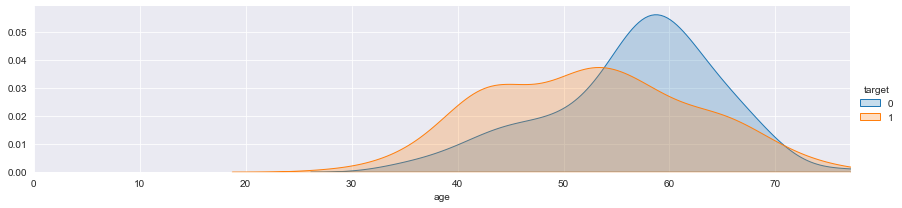

In [11]:
facet = sns.FacetGrid(df_heart, hue ='target', aspect=4)
facet.map(sns.kdeplot,'age',shade = True) # kde : 이차원 밀집도 그래프
facet.set(xlim=(0,df_heart['age'].max()))
facet.add_legend()
sns.axes_style('dark')

plt.show()

- 0: 심장병 진단 아님, 1: 심장병 진단

안정 혈압 별로 심장병 진단 보기

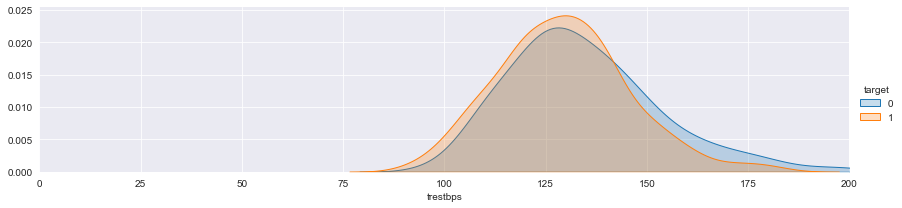

In [12]:
facet = sns.FacetGrid(df_heart, hue ='target', aspect=4)
facet.map(sns.kdeplot,'trestbps',shade = True) # kde : 이차원 밀집도 그래프
facet.set(xlim=(0,df_heart['trestbps'].max()))
facet.add_legend()
sns.axes_style('dark')

plt.show()

혈청 콜레스트롤 별로 심장병 진단 보기

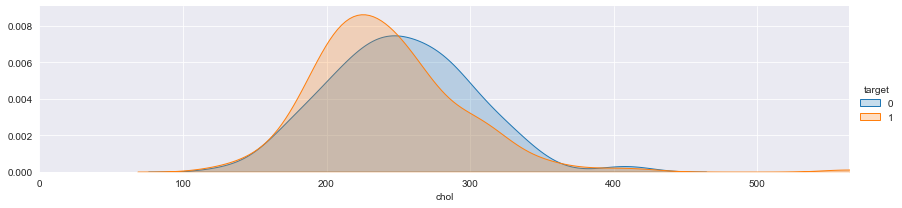

In [13]:
facet = sns.FacetGrid(df_heart, hue ='target', aspect=4)
facet.map(sns.kdeplot,'chol',shade = True) # kde : 이차원 밀집도 그래프
facet.set(xlim=(0,df_heart['chol'].max()))
facet.add_legend()
sns.axes_style('dark')

plt.show()

최대 심장 박동 수 별로 심장병 진단 보기

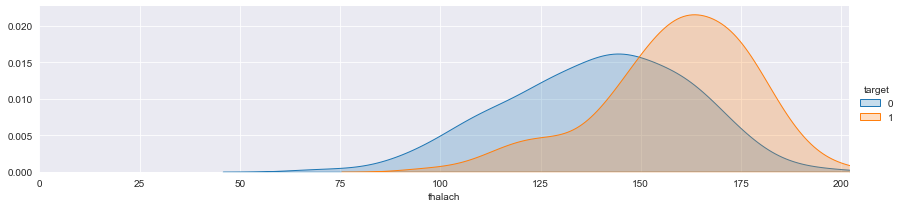

In [14]:
facet = sns.FacetGrid(df_heart, hue ='target', aspect=4)
facet.map(sns.kdeplot,'thalach',shade = True) # kde : 이차원 밀집도 그래프
facet.set(xlim=(0,df_heart['thalach'].max()))
facet.add_legend()
sns.axes_style('dark')

plt.show()

나머지 특성별로 심장병 진단 비교하여 보기
--

In [15]:
def bar_chart2(feature):
    heart_disease = df_heart[df_heart['target'] ==1][feature].value_counts() # 생존자를 카운트
    non_heart_disease = df_heart[df_heart['target'] ==0][feature].value_counts() #사망자를 카운트
    df = pd.DataFrame([heart_disease,non_heart_disease]) #[생존자,사망자]를 dataFrame
    df.index = ['YES','NO'] # index화
    df.plot(kind = 'bar',stacked = True, figsize = (10,5)) #그림을 그림

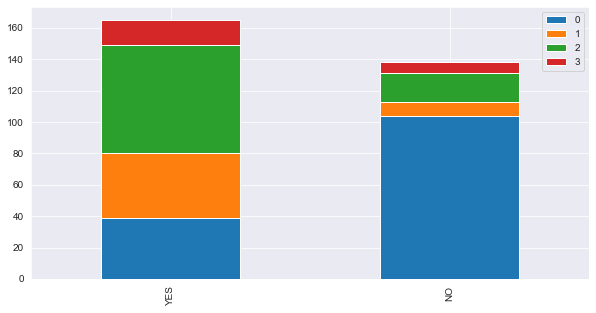

In [16]:
bar_chart2('cp')

- cp: 가슴 통증 유형(0~4)

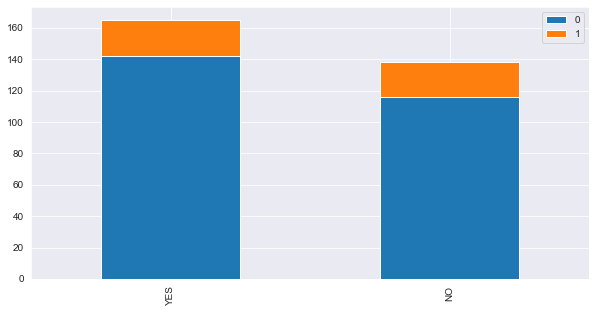

In [17]:
bar_chart2('fbs')

- fbs: 공복 혈당 > 120mg/dl (1 == true, 0 == false)

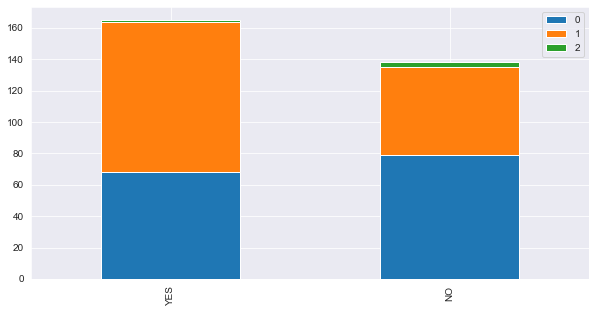

In [18]:
bar_chart2('restecg')

- restecg: 안정 심전도 결과(0,1,2)

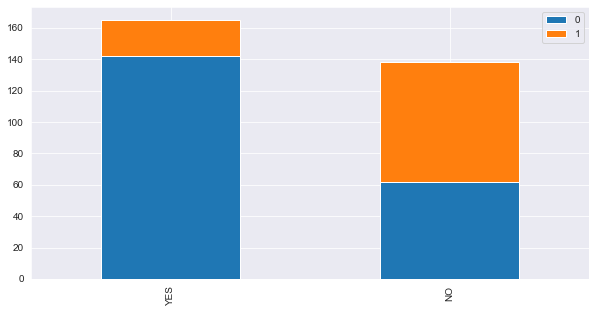

In [19]:
bar_chart2('exang')

- exang: 협심증 유발 운동 (1==yes, 0== no)

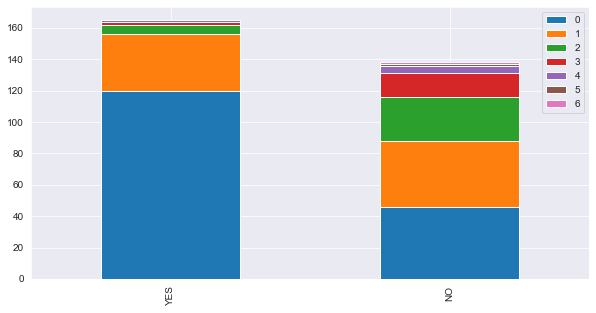

In [20]:
bar_chart2('oldpeak')

- oldpeak: 비교적 안정되기까지 운동으로 유발되는 ST depression

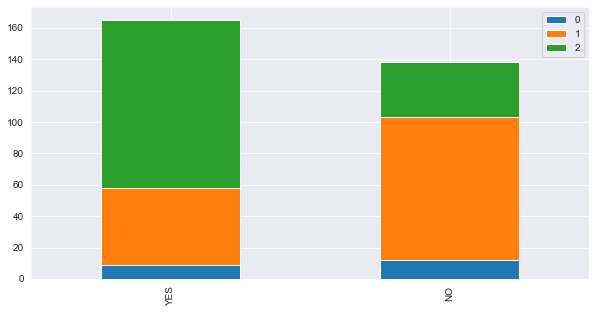

In [21]:
bar_chart2('slope')

- slope: 최대 운동 ST segmant의 기울기

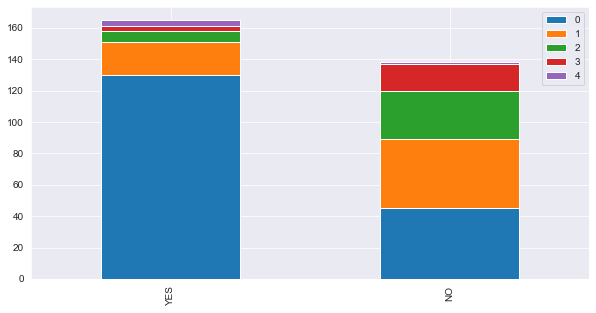

In [22]:
bar_chart2('ca')

- ca: 형광 투시된 주요 혈관 개수(0~3)

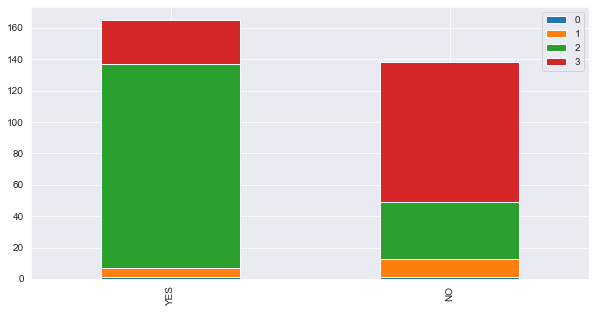

In [23]:
bar_chart2('thal')

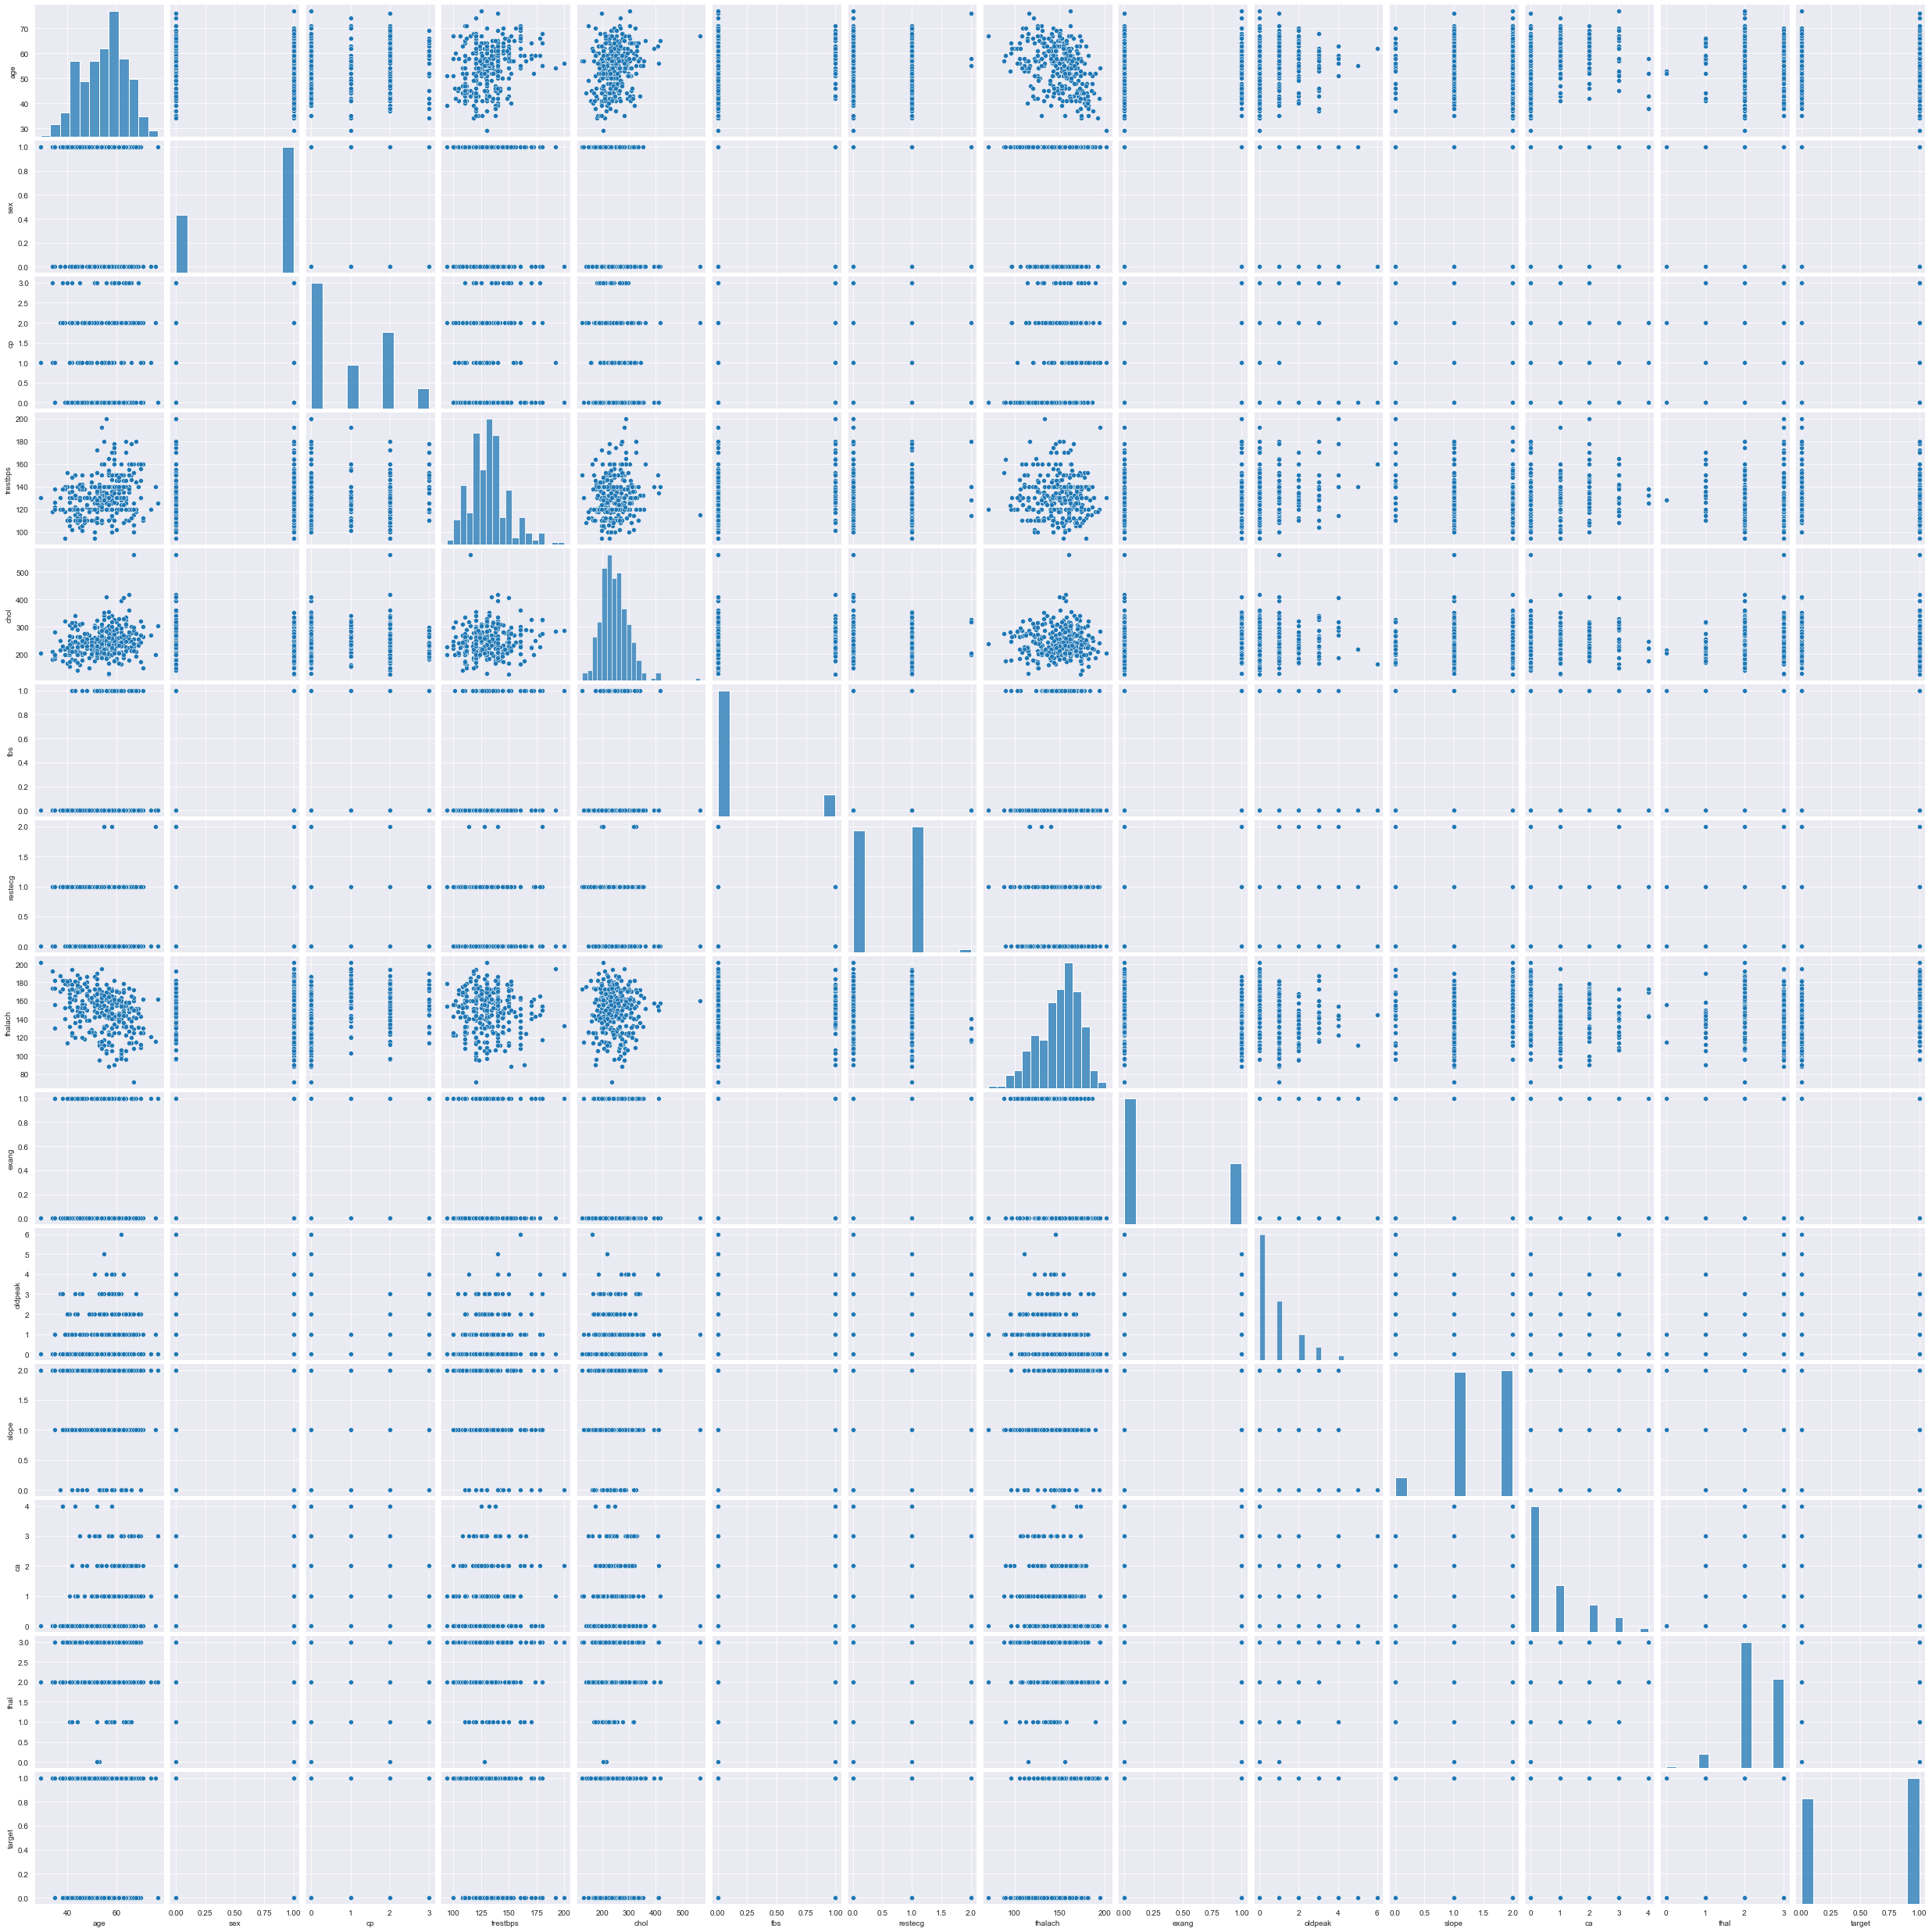

In [24]:
# 한 눈에 보기
sns.pairplot(df_heart)
plt.show()

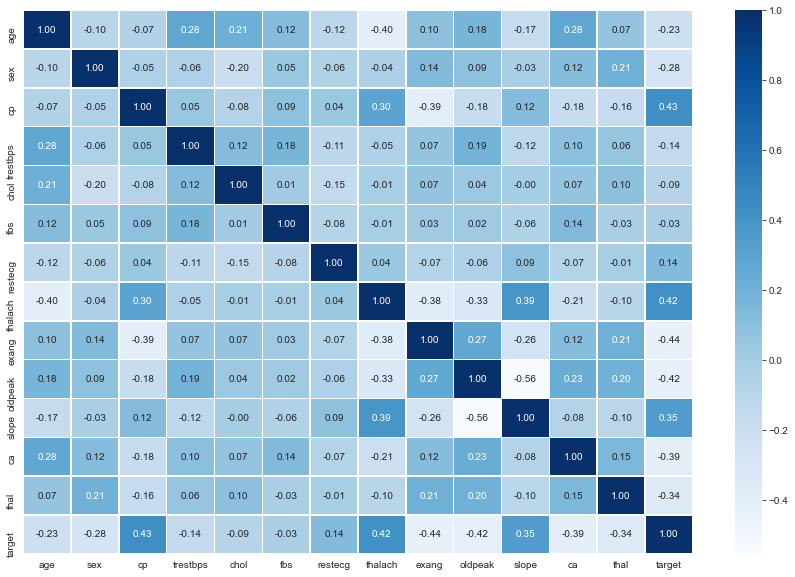

In [25]:
# 한 눈에 상관관계 보기
plt.figure(figsize=(15,10))
sns.heatmap(data=df_heart.corr(), annot=True, fmt ='.2f', linewidths=.5, cmap='Blues')
plt.show()

In [26]:
df_heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1,1,1,3,0


thalach와 target 선형관계 분석
--

<AxesSubplot:xlabel='thalach', ylabel='target'>

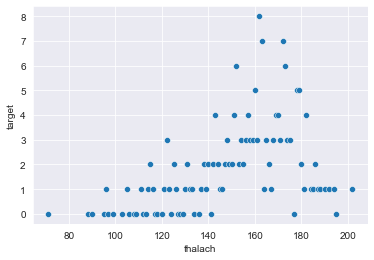

In [27]:
# 최대 심장 박동 수와 심장병 진단 상관관계 보기
thalach_target=df_heart.groupby(['thalach'])['target'].sum().reset_index()
sns.scatterplot(thalach_target['thalach'],thalach_target['target'])

In [28]:
X=thalach_target.thalach
y=thalach_target.target

X=np.array(X).reshape(-1,1)
y=np.array(y).reshape(-1,1)

print(X.shape)
print(y.shape)

(91, 1)
(91, 1)


훈련데이터와 테스트 데이터 나누기

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(72, 1)
(19, 1)
(72, 1)
(19, 1)


- train 점수 보기

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error

reg_1=LinearRegression()
reg_1.fit(X_train, y_train)

y_train_pred=reg_1.predict(X_train)
rmse=(np.sqrt(mean_squared_error(y_train, y_train_pred)))
r2=round(reg_1.score(X_train, y_train),2)

print('rmse는', format(rmse), '입니다.')
print('r2는', format(r2), '입니다.')
print('train 스코어는', format(reg_1.score(X_train, y_train)), '입니다.')

rmse는 1.6197309271678786 입니다.
r2는 0.22 입니다.
train 스코어는 0.22425447267952214 입니다.


- test 점수 보기

In [31]:
y_pred_test=reg_1.predict(X_test)
rmse=(np.sqrt(mean_squared_error(y_test, y_pred_test)))
r2=round(reg_1.score(X_test, y_test), 2)

print('rmse는', format(rmse), '입니다.')
print('r2는', format(r2), '입니다.')
print('test 스코어는', format(reg_1.score(X_test, y_test)), '입니다.')

rmse는 1.5921095290946932 입니다.
r2는 0.08 입니다.
test 스코어는 0.0849325962990809 입니다.


- X는 thalach(최대 심박동 수)

- y는 target(심장병 진단)

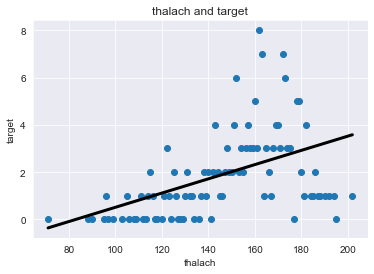

In [32]:
prediction_space=np.linspace(min(X), max(X)).reshape(-1,1)
plt.scatter(X,y)
plt.plot(prediction_space, reg_1.predict(prediction_space), color='black', linewidth=3)
plt.ylabel('target')
plt.xlabel('thalach')
plt.title('thalach and target')
plt.show()

chol과 target 선형 관계 분석
--

혈청 콜레스트롤에 따른 심장병 진단 보기

<AxesSubplot:xlabel='chol', ylabel='target'>

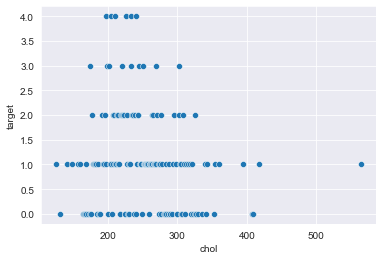

In [33]:
# 혈청 콜레스트롤와 심장병 진단 상관관계 보기
chol_target=df_heart.groupby(['chol'])['target'].sum().reset_index()
sns.scatterplot(chol_target['chol'],chol_target['target'])

In [34]:
X=chol_target.chol
y=chol_target.target

X=np.array(X).reshape(-1,1)
y=np.array(y).reshape(-1,1)

print(X.shape)
print(y.shape)

(152, 1)
(152, 1)


In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(121, 1)
(31, 1)
(121, 1)
(31, 1)


- train 점수보기

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error

reg_1=LinearRegression()
reg_1.fit(X_train, y_train)

y_train_pred=reg_1.predict(X_train)
rmse=(np.sqrt(mean_squared_error(y_train, y_train_pred)))
r2=round(reg_1.score(X_train, y_train),2)

print('rmse는', format(rmse), '입니다.')
print('r2는', format(r2), '입니다.')
print('train 스코어는', format(reg_1.score(X_train, y_train)), '입니다.')

rmse는 1.0133597452780798 입니다.
r2는 0.01 입니다.
train 스코어는 0.010737384667841243 입니다.


- test 점수 보기

In [37]:
y_pred_test=reg_1.predict(X_test)
rmse=(np.sqrt(mean_squared_error(y_test, y_pred_test)))
r2=round(reg_1.score(X_test, y_test), 2)

print('rmse는', format(rmse), '입니다.')
print('r2는', format(r2), '입니다.')
print('test 스코어는', format(reg_1.score(X_test, y_test)), '입니다.')

rmse는 1.0558820222608178 입니다.
r2는 0.04 입니다.
test 스코어는 0.03995855019607164 입니다.


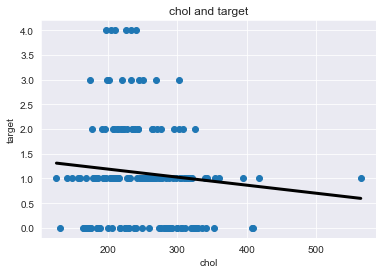

In [38]:
prediction_space=np.linspace(min(X), max(X)).reshape(-1,1)
plt.scatter(X,y)
plt.plot(prediction_space, reg_1.predict(prediction_space), color='black', linewidth=3)
plt.ylabel('target')
plt.xlabel('chol')
plt.title('chol and target')
plt.show()

trestbps와 target 선형 관계 분석
--

안정 혈압에 따른 심장병 진단 보기

<AxesSubplot:xlabel='trestbps', ylabel='target'>

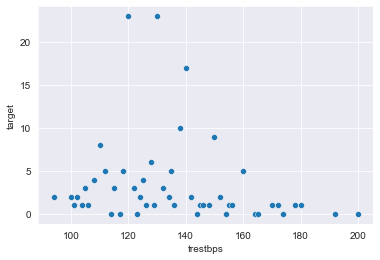

In [39]:
# 혈청 콜레스트롤와 심장병 진단 상관관계 보기
trestbps_target=df_heart.groupby(['trestbps'])['target'].sum().reset_index()
sns.scatterplot(trestbps_target['trestbps'],trestbps_target['target'])

In [40]:
X=trestbps_target.trestbps
y=trestbps_target.target

X=np.array(X).reshape(-1,1)
y=np.array(y).reshape(-1,1)

print(X.shape)
print(y.shape)

(49, 1)
(49, 1)


In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(39, 1)
(10, 1)
(39, 1)
(10, 1)


- train 점수 보기

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error

reg_1=LinearRegression()
reg_1.fit(X_train, y_train)

y_train_pred=reg_1.predict(X_train)
rmse=(np.sqrt(mean_squared_error(y_train, y_train_pred)))
r2=round(reg_1.score(X_train, y_train),2)

print('rmse는', format(rmse), '입니다.')
print('r2는', format(r2), '입니다.')
print('train 스코어는', format(reg_1.score(X_train, y_train)), '입니다.')

rmse는 5.456752572630198 입니다.
r2는 0.02 입니다.
train 스코어는 0.020512952987229882 입니다.


- test 점수 보기

In [43]:
y_pred_test=reg_1.predict(X_test)
rmse=(np.sqrt(mean_squared_error(y_test, y_pred_test)))
r2=round(reg_1.score(X_test, y_test), 2)

print('rmse는', format(rmse), '입니다.')
print('r2는', format(r2), '입니다.')
print('test 스코어는', format(reg_1.score(X_test, y_test)), '입니다.')

rmse는 2.803445897937606 입니다.
r2는 0.13 입니다.
test 스코어는 0.13060742227177102 입니다.


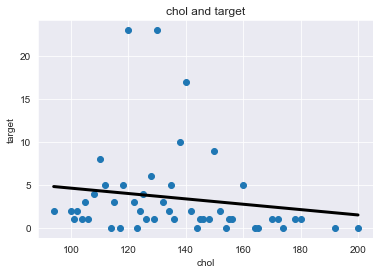

In [44]:
prediction_space=np.linspace(min(X), max(X)).reshape(-1,1)
plt.scatter(X,y)
plt.plot(prediction_space, reg_1.predict(prediction_space), color='black', linewidth=3)
plt.ylabel('target')
plt.xlabel('chol')
plt.title('chol and target')
plt.show()

지도학습
--

모든 변수를 포함한 Regression Model 만들기
--

In [45]:
X=df_heart.drop('target', axis=1)
y=df_heart.target

print(X.shape)
print(y.shape)

(303, 13)
(303,)


In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(242, 13)
(61, 13)
(242,)
(61,)


In [47]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error

reg_all=LinearRegression()
reg_all.fit(X_train, y_train)

LinearRegression()

- train 점수 보기

In [48]:
y_train_pred=reg_all.predict(X_train)
rmse=(np.sqrt(mean_squared_error(y_train, y_train_pred)))
r2=round(reg_all.score(X_train, y_train), 2)

print('rmse 는', format(rmse), '입니다.')
print('r2 는', format(r2), '입니다.')
print('train 스코어는', format(reg_all.score(X_train, y_train)), '입니다.')

rmse 는 0.34899763615674684 입니다.
r2 는 0.51 입니다.
train 스코어는 0.5079632243969042 입니다.


- test 점수 보기

In [49]:
y_test_pred=reg_all.predict(X_test)
rmse=(np.sqrt(mean_squared_error(y_test, y_test_pred)))
r2=round(reg_all.score(X_test, y_test), 2)

print('rmse 점수는', format(rmse), '입니다.')
print('r2 점수는', format(r2), '입니다.')
print('test 스코어는', format(reg_all.score(X_test, y_test)), '입니다.')

rmse 점수는 0.3438613847350393 입니다.
r2 점수는 0.53 입니다.
test 스코어는 0.5258906618920527 입니다.


In [50]:
import statsmodels.api as sm

# 변수들에 상수항을 추가함
X_constant=sm.add_constant(X)

model_1=sm.OLS(y,X_constant)
lin_reg=model_1.fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     23.73
Date:                Fri, 07 May 2021   Prob (F-statistic):           2.12e-38
Time:                        10:11:50   Log-Likelihood:                -108.66
No. Observations:                 303   AIC:                             245.3
Df Residuals:                     289   BIC:                             297.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8296      0.293      2.827      0.005       0.252       1.407
age           -0.0011      0.003     -0.400      0.689      -0.006       0.004
sex           -0.1982      0.047     -4.202      0.000      -0.291      -0.105
cp             0.1096      0.022      4.885      0.000       0.065       0.154
trestbps      -0.0020      0.001     -1.581      0.115      -0.004       0.000
chol          -0.0004      0.000     -0.893      0.373      -0.001       0.000
fbs            0.0226      0.060      0.379      0.705      -0.095       0.140
restecg        0.0494      0.040      1.236      0.218      -0.029       0.128
thalach        0.0030      0.001      2.691      0.008       0.001       0.005
exang         -0.1486      0.051     -2.897      0.004      -0.250      -0.048
oldpeak       -0.0587      0.024     -2.416      0.016      -0.106      -0.011
slope          0.0851      0.042      2.034      0.043       0.003       0.167
ca            -0.1004      0.022     -4.578      0.000      -0.144      -0.057
thal          -0.1207      0.036     -3.385      0.001      -0.191      -0.050
==============================================================================
Omnibus:                        6.176   Durbin-Watson:                   1.033
Prob(Omnibus):                  0.046   Jarque-Bera (JB):                6.341
Skew:                          -0.341   Prob(JB):                       0.0420
Kurtosis:                       2.807   Cond. No.                     4.68e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.68e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [51]:
from sklearn.metrics import mean_squared_error , r2_score

# Linear Regression OLS(ordinary Least Square(OLS) method/ Error function을 gradient method)로 학습/예측/평가 수행. 
lr = LinearRegression()
lr.fit(X_train ,y_train ) # model이 train을 하여라.
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)  
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 0.118 , RMSE : 0.344
Variance score : 0.526


In [52]:
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X.columns )
coeff.sort_values(ascending=False)

slope       0.1
restecg     0.1
cp          0.1
thalach     0.0
fbs         0.0
chol       -0.0
trestbps   -0.0
age        -0.0
thal       -0.1
ca         -0.1
oldpeak    -0.1
exang      -0.2
sex        -0.2
dtype: float64

Linear Regression, Ridge, Lasso, Elastic Net 비교
--

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso, ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error , r2_score

lr=LinearRegression()
lr.fit(X_train, y_train)
y_pred=lr.predict(X_test)
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
print('lr train score: {:.3f}'.format(lr.score(X_train, y_train)))
print('lr test score: {:.3f}'.format(lr.score(X_test, y_test)))
print('lr mse: {:.3f}'.format(mse))
print('lr rmse: {:.3f}'.format(rmse))
print('\n')


ridge = Ridge()
ridge.fit(X_train, y_train)
y_pred=ridge.predict(X_test)
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
print('ridge train score: {:.3f}'.format(ridge.score(X_train, y_train)))
print('ridge test score: {:.3f}'.format(ridge.score(X_test, y_test)))
print('ridge mse: {:.3f}'.format(mse))
print('ridge rmse: {:.3f}'.format(rmse))
print('\n')

lasso = Lasso()
lasso.fit(X_train, y_train)
y_pred=lasso.predict(X_test)
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
print('lasso train score: {:.3f}'.format(lasso.score(X_train, y_train)))
print('lasso test score: {:.3f}'.format(lasso.score(X_test, y_test)))
print('lasso mse: {:.3f}'.format(mse))
print('lasso rmse: {:.3f}'.format(rmse))
print('\n')


elasticnet = ElasticNet()
elasticnet.fit(X_train, y_train)
y_pred=elasticnet.predict(X_test)
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
print('elasticnet train score: {:.3f}'.format(elasticnet.score(X_train, y_train)))
print('elasticnet test score: {:.3f}'.format(elasticnet.score(X_test, y_test)))
print('elasticnet mse: {:.3f}'.format(mse))
print('elasticnet rmse: {:.3f}'.format(rmse))

lr train score: 0.508
lr test score: 0.526
lr mse: 0.118
lr rmse: 0.344


ridge train score: 0.508
ridge test score: 0.527
ridge mse: 0.118
ridge rmse: 0.343


lasso train score: 0.149
lasso test score: 0.245
lasso mse: 0.188
lasso rmse: 0.434


elasticnet train score: 0.160
elasticnet test score: 0.279
elasticnet mse: 0.180
elasticnet rmse: 0.424


Logistic Regression Model
--

In [54]:
X=df_heart.drop('target', axis=1)
y=df_heart.target

print(X.shape)
print(y.shape)

(303, 13)
(303,)


In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(242, 13)
(61, 13)
(242,)
(61,)


- train, test 점수 보기

In [56]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)
clf.fit(X_test, y_test)
y_pred=clf.predict(X_test)
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)

print('mse는: {:.3f}'.format(mse))
print('rmse는: {:.3f}'.format(rmse))
print('\n')
print('Logistic train 점수는: {:.3f}'.format(clf.score(X_train, y_train)))
print('Logistic test 점수는: {:.3f}'.format(clf.score(X_test, y_test)))

mse는: 0.066
rmse는: 0.256


Logistic train 점수는: 0.777
Logistic test 점수는: 0.934


K-Nearest Neighbors
--

In [57]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train,y_train)

print('KNN accuracy : {:.2f}'.format(knn.score(X_test,y_test)))

KNN accuracy : 0.66


Navie Bayes
--

In [58]:
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(X_train,y_train)
model.fit(X_test, y_test)
y_pred = model.predict(X_test)
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?

print('Navie Bayes train score: ', format(model.score(X_train, y_train)))
print('Navie Bayes test score: ', format(model.score(X_test, y_test)))
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Navie Bayes train score:  0.7768595041322314
Navie Bayes test score:  0.9016393442622951
Accuracy: 0.9016393442622951


Decision Tree
--

In [59]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(min_samples_leaf=6,random_state=42)
dt_clf.fit(X_train, y_train)
dt_clf.fit(X_test, y_test)
y_pred = dt_clf.predict(X_test)

print('Decision tree train score: ', format(dt_clf.score(X_train, y_train)))
print('Decision tree test score: ', format(dt_clf.score(X_test, y_test)))
print("Accuracy on test set: {:.3f}".format(dt_clf.score(X_test, y_pred)))

Decision tree train score:  0.7148760330578512
Decision tree test score:  0.8524590163934426
Accuracy on test set: 1.000


In [60]:
print("Feature importances:")
print(dt_clf.feature_importances_)

Feature importances:
[0.05245164 0.         0.74117001 0.01279866 0.         0.
 0.         0.19357969 0.         0.         0.         0.
 0.        ]


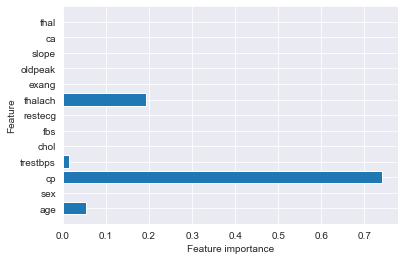

In [61]:
def plot_feature_importances_heart_disease(model):
    n_features = X.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_heart_disease(dt_clf)

Random Forest
--

Hyperparameter
- n_estimators: 랜덤 포레스트 안의 결정 트리 갯수

- n_estimators는 클수록 좋습니다.

결정 트리가 많을수록 더 깔끔한 Decision Boundary가 나오겠죠.
하지만 그만큼 메모리와 훈련 시간이 증가합니다. Default는 10입니다.

- max_features: 무작위로 선택할 Feature의 개수

max_features=n_features이면 30개의 feature 중 30개의 feature 모두를 선택해 결정 트리를 만듭니다. 단, bootstrap=True이면 30개의 feature에서 복원 추출로 30개를 뽑습니다.

특성 선택의 무작위성이 없어질 뿐 샘플링의 무작위성은 그대로인 것입니다.
bootstrap=True는 default 값입니다.

따라서 max_features 값이 크다면 랜덤 포레스트의 트리들이 매우 비슷해지고, 가장 두드러진 특성에 맞게 예측을 할 것입니다.

max_features 값이 작다면 랜덤 포레스트의 트리들이 서로 매우 달라질 것입니다. 따라서 오버피팅이 줄어들 것입니다.

- max_features는 일반적으로 Defalut 값을 씁니다.

- max_depth : 트리의 깊이를 뜻합니다.

- min_samples_leaf : 리프노드가 되기 위한 최소한의 샘플 데이터 수 입니다.

- min_samples_split : 노드를 분할하기 위한 최소한의 데이터 수 입니다.

- max_leaf_nodes : 리프노드의 최대 개수

In [62]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=5, n_jobs=-1, random_state=42)
forest.fit(X_train, y_train)
forest.fit(X_test, y_test)

print('랜덤포레스트 train 점수는', format(forest.score(X_train,y_train)), '입니다.')
print('랜덤포레스트 test 점수는', format(forest.score(X_test, y_test)), '입니다.')

랜덤포레스트 train 점수는 0.7644628099173554 입니다.
랜덤포레스트 test 점수는 0.9836065573770492 입니다.


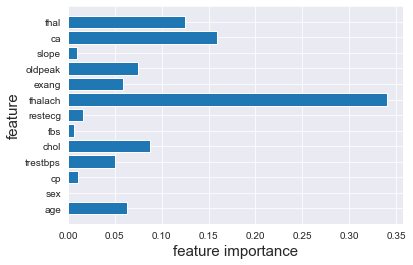

In [63]:
n_feature=X.shape[1]
index=np.arange(n_feature)

plt.barh(index, forest.feature_importances_, align='center')

plt.ylim(-1, n_feature)
plt.yticks(index, X)
plt.xlabel('feature importance', size=15)

plt.ylabel('feature', size=15)

plt.show()

In [64]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

Decision = DecisionTreeClassifier()
Randomforest = RandomForestClassifier(bootstrap=False)
Randomforest.fit(X_train, y_train)
Decision.fit(X_train,y_train)
y_train_pred_Deci = Decision.predict(X_train)
y_test_pred_Deci = Decision.predict(X_test)
y_train_pred = Randomforest.predict(X_train)
y_test_pred = Randomforest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test, y_test_pred)))

print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred_Deci),mean_squared_error(y_test, y_test_pred_Deci)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred_Deci),r2_score(y_test, y_test_pred_Deci)))

MSE train: 0.000, test: 0.180
R^2 train: 1.000, test: 0.277
MSE train: 0.000, test: 0.164
R^2 train: 1.000, test: 0.343


In [65]:
Randomforest.score(X_train, y_train)

1.0

In [66]:
Randomforest.score(X_test, y_test)

0.819672131147541

In [67]:
from sklearn import metrics
confusion_matrix=metrics.confusion_matrix(y_test,y_test_pred)
confusion_matrix

array([[24,  5],
       [ 6, 26]], dtype=int64)

In [68]:
y_prob = Randomforest.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
random_y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
Randomforest.score(X_test, random_y_pred)

1.0

In [69]:
auc_roc=metrics.classification_report(y_test,random_y_pred)
auc_roc

'              precision    recall  f1-score   support\n\n           0       0.80      0.83      0.81        29\n           1       0.84      0.81      0.83        32\n\n    accuracy                           0.82        61\n   macro avg       0.82      0.82      0.82        61\nweighted avg       0.82      0.82      0.82        61\n'

In [70]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

Text(0.5, 0, 'False Positive Rate')

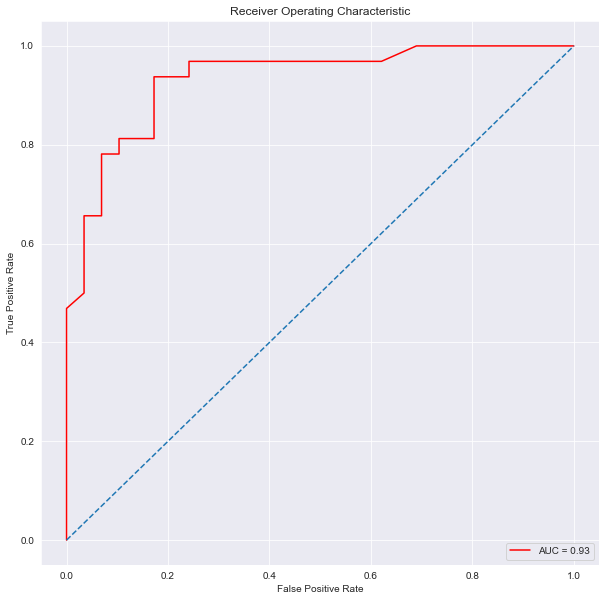

In [71]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

Ada boosting
--

In [72]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics

abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1,random_state = 7777)
model = abc.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

ADAscore_train = abc.score(X_train, y_train) # train set 정확도

print('Ada boosting train 점수는 {:.3f}'.format(ADAscore_train))

ADAscore_test = abc.score(X_test, y_test) # 일반화 정확도

print('Ada boosting test 점수는 {:.3f}'.format(ADAscore_test))

Accuracy: 0.7868852459016393
Ada boosting train 점수는 0.930
Ada boosting test 점수는 0.787


하이퍼 파라미터

- n_estimator: 결정 트리의 개수. default는 10, 많을 수록 좋은 성능이 나올 수도 있지만, 무조건적인 것은 아님

- max_features : 데이터의 feature를 참조할 비율, 개수를 뜻합니다. default는 auto입니다.

- max_depth : 트리의 깊이를 뜻함.

- min_samples_leaf : 리프노드가 되기 위한 최소한의 샘플 데이터 수

- min_samples_leaf : 리프노드가 되기 위한 최소한의 샘플 데이터 수

- min_samples_split : 리프노드가 되기 위한 최소한의 샘플 데이터 수

Graident Boosting
--

- loss : gradient descent에서 사용할 비용 함수. 특별한 이유가 없으면 deafult로 감

- learning_rate : 값이 너무 적으면 학습이 더디고, 값이 너무 크면 튈 수도 있음.적정한 값을 유지하는 것이 좋음.

- subsample : weark learner가 학습에 사용하는 데이터의 샘플링 비율. 기본값은 1이며 전체 학습 데이터으로 기반함.0.7이면 70%을 뜻함.

하지만 Gradient Boosting부터는 grid Search 등을 이용해서 hyperparameter tuning 작업을 할 때 주의사항이 있음.

gradient boosting부터는 하이퍼 파라미터가 매우 많기 때문에 하이퍼 파라미터 튜닝 과정에서 시간소모가 크게 작용 됨. 그래서 수행시간이 오래 걸릴 수 있음.

In [73]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(random_state=0) # 기본값: max_depth=3, learning_rate=0.1

gbc.fit(X_train, y_train)

GBscore_train = gbc.score(X_train, y_train) # train set 정확도

print('Gradient boosting train 점수는 {:.3f}'.format(GBscore_train))

GBscore_test = gbc.score(X_test, y_test) # 일반화 정확도

print('Gradient boosting test 점수는 {:.3f}'.format(GBscore_test))

Gradient boosting train 점수는 0.996
Gradient boosting test 점수는 0.770


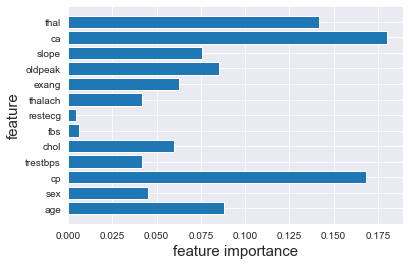

In [74]:
n_feature=X.shape[1]
index=np.arange(n_feature)

plt.barh(index, gbc.feature_importances_, align='center')

plt.ylim(-1, n_feature)
plt.yticks(index, X)
plt.xlabel('feature importance', size=15)

plt.ylabel('feature', size=15)

plt.show()

In [75]:
y_prob = gbc.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
random_y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
gbc.score(X_test, random_y_pred)

1.0

In [76]:
auc_roc=metrics.classification_report(y_test,random_y_pred)
auc_roc

'              precision    recall  f1-score   support\n\n           0       0.74      0.79      0.77        29\n           1       0.80      0.75      0.77        32\n\n    accuracy                           0.77        61\n   macro avg       0.77      0.77      0.77        61\nweighted avg       0.77      0.77      0.77        61\n'

In [77]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

Text(0.5, 0, 'False Positive Rate')

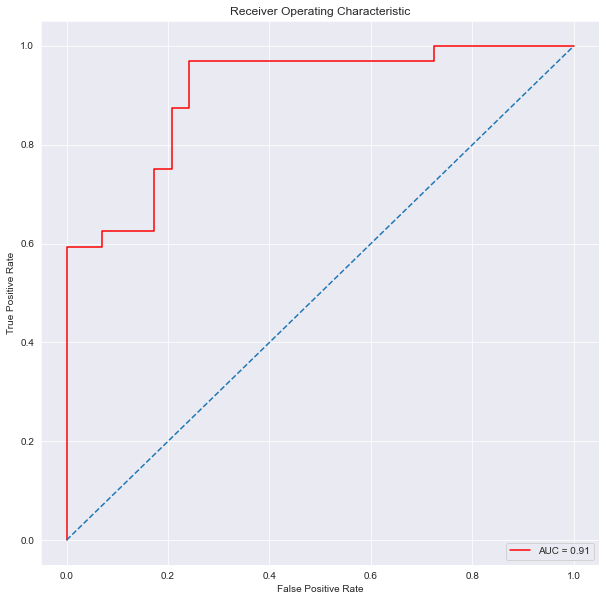

In [78]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

XGBoost
--

1. Parameter 종류
- General Parameter: 전체 기능을 가이드

- Boost Parameter: 각각의 step에서 booster 가이드

- Learning Task Parameter: 최적화 수행 가이드

- General Parameter

- booster: tree 기반 모델 / 선형 모델

- silent: 메세지 조절

- nthread: 병렬 처리 조절

- Boost Parameter

- eta: Learning rate(일반적으로 0.01 - 0.2)

- min_child_weight: min_child_weight를 기준으로 추가 분기 결정(크면 - Underfitting)

- max_depth: Tree 깊이 수

- max_leaf_node: 하나의 트리에서 node 개수

- gamma: split 하기 위한 최소의 loss 감소 정의

- subsample: 데이터 중 샘플링(0.5 - 1)

- colsample_bytree: column 중 sampling(0.5 - 1)

- colsample_bylevel: 각 level마다 샘플링 비율

- lambda: L2 nrom

- alpha: L1 norm

- scale_pos_weight: positive, negative weight 지정 기타 등

2. Learning Task Parameter

- object: 목적함수 종류

- binary:logistic(이진 분류)

- multi:softmax(다중 분류)

- multi-softprob(다중 확률)

3. eval_metric: 평가 지표

- rmse – root mean square error

- mae – mean absolute error

- logloss – negative log-likelihood

- error – Binary classification error rate (0.5 threshold)

- merror – Multiclass classification error rate

- mlogloss – Multiclass logloss

- auc: Area under the curve

4. seed(Reproducibility)

- np.random.seed()

In [79]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=0) # 기본값: max_depth=3, learning_rate=0.1

xgb.fit(X_train, y_train)

XGBscore_train = xgb.score(X_train, y_train) # train set 정확도

print('XGboosting train 점수는 {:.3f}'.format(XGBscore_train))

XGBscore_test = xgb.score(X_test, y_test) # 일반화 정확도

print('XGboosting test 점수는 {:.3f}'.format(XGBscore_test))


[10:11:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGboosting train 점수는 1.000
XGboosting test 점수는 0.836


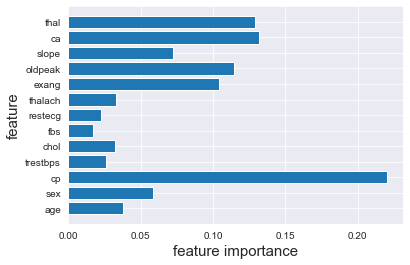

In [80]:
n_feature=X.shape[1]
index=np.arange(n_feature)

plt.barh(index, xgb.feature_importances_, align='center')

plt.ylim(-1, n_feature)
plt.yticks(index, X)
plt.xlabel('feature importance', size=15)

plt.ylabel('feature', size=15)

plt.show()

In [81]:
y_prob = xgb.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
random_y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
xgb.score(X_test, random_y_pred)

1.0

In [82]:
auc_roc=metrics.classification_report(y_test,random_y_pred)
auc_roc

'              precision    recall  f1-score   support\n\n           0       0.81      0.86      0.83        29\n           1       0.87      0.81      0.84        32\n\n    accuracy                           0.84        61\n   macro avg       0.84      0.84      0.84        61\nweighted avg       0.84      0.84      0.84        61\n'

In [83]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

Text(0.5, 0, 'False Positive Rate')

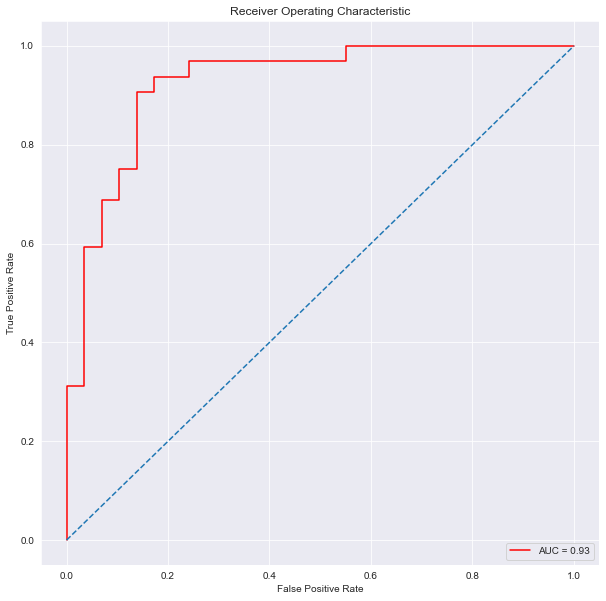

In [84]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

Lightgbm
--

In [85]:
#!pip install lightgbm

In [86]:
#conda upgrade --all -y
#conda install -c conda-forge fsspec
#conda install -c conda-forge/label/cf202003 fsspec

In [87]:
#from lightgbm import LGBMClassifier  

#lgbm = LGBMClassifier(random_state=0) # 기본값: max_depth=3, learning_rate=0.1

#lgbm.fit(X_train, y_train)

#LGBMscore_train = lgbm.score(X_train, y_train) # train set 정확도

#print('lightgbm train 점수는 {:.3f}'.format(LGBMscore_train))

#LGBMscore_test = lgbm.score(X_test, y_test) # 일반화 정확도

#print('lightgbm test 점수는 {:.3f}'.format(LGBMscore_test))

In [88]:
# Attribute error: partially initialized module 'fsspec' has no attribute 'utils' (most likely due to a circular import)

In [89]:
# 돌아가지 않는다.

Cat boosting
--

In [90]:
from catboost import CatBoostClassifier

cb = CatBoostClassifier(random_state=0) # 기본값: max_depth=3, learning_rate=0.1

cb.fit(X_train, y_train)

CBscore_train = cb.score(X_train, y_train) # train set 정확도

print('CatBoosting train 점수는 {:.3f}'.format(CBscore_train))

CBscore_test = cb.score(X_test, y_test) # 일반화 정확도

print('CatBoosting test 점수는 {:.3f}'.format(CBscore_test))

Learning rate set to 0.005621
0:	learn: 0.6884219	total: 93ms	remaining: 1m 32s
1:	learn: 0.6846992	total: 94.6ms	remaining: 47.2s
2:	learn: 0.6804482	total: 96.2ms	remaining: 32s
3:	learn: 0.6762280	total: 97.7ms	remaining: 24.3s
4:	learn: 0.6716854	total: 99ms	remaining: 19.7s
5:	learn: 0.6672902	total: 100ms	remaining: 16.6s
6:	learn: 0.6637280	total: 102ms	remaining: 14.4s
7:	learn: 0.6597223	total: 103ms	remaining: 12.7s
8:	learn: 0.6557464	total: 104ms	remaining: 11.4s
9:	learn: 0.6518919	total: 105ms	remaining: 10.4s
10:	learn: 0.6477614	total: 106ms	remaining: 9.5s
11:	learn: 0.6441342	total: 107ms	remaining: 8.79s
12:	learn: 0.6405369	total: 108ms	remaining: 8.18s
13:	learn: 0.6370827	total: 109ms	remaining: 7.66s
14:	learn: 0.6332016	total: 110ms	remaining: 7.23s
15:	learn: 0.6288236	total: 111ms	remaining: 6.84s
16:	learn: 0.6253024	total: 112ms	remaining: 6.5s
17:	learn: 0.6212056	total: 114ms	remaining: 6.2s
18:	learn: 0.6180988	total: 115ms	remaining: 5.93s
19:	learn: 0.6

In [91]:
y_prob = cb.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
random_y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
cb.score(X_test, random_y_pred)

1.0

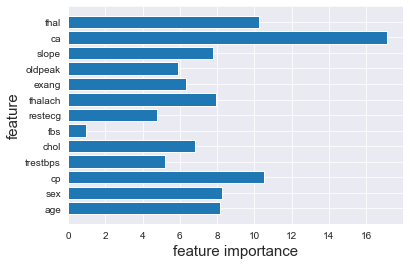

In [92]:
n_feature=X.shape[1]
index=np.arange(n_feature)

plt.barh(index, cb.feature_importances_, align='center')

plt.ylim(-1, n_feature)
plt.yticks(index, X)
plt.xlabel('feature importance', size=15)

plt.ylabel('feature', size=15)

plt.show()

In [93]:
auc_roc=metrics.classification_report(y_test,random_y_pred)
auc_roc

'              precision    recall  f1-score   support\n\n           0       0.86      0.83      0.84        29\n           1       0.85      0.88      0.86        32\n\n    accuracy                           0.85        61\n   macro avg       0.85      0.85      0.85        61\nweighted avg       0.85      0.85      0.85        61\n'

In [94]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

Text(0.5, 0, 'False Positive Rate')

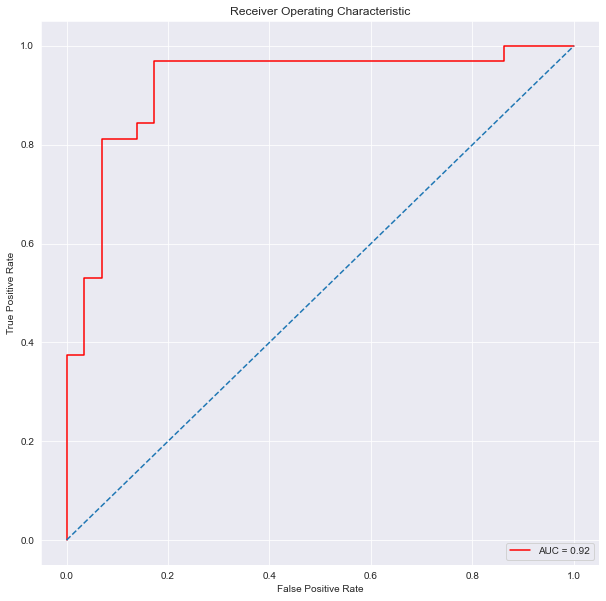

In [95]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

모든 점수 비교하여  한 번에 보기
--

- 회귀분석 점수

In [96]:
print('선형회귀분석 train 점수는: {:.3f}'.format(lr.score(X_train, y_train)))
print('선형회귀분석 test 점수는: {:.3f}'.format(lr.score(X_test, y_test)))
print('\n')
print('ridge train 점수는: {:.3f}'.format(ridge.score(X_train, y_train)))
print('ridge test 점수는: {:.3f}'.format(ridge.score(X_test, y_test)))
print('\n')
print('lasso train 점수는: {:.3f}'.format(lasso.score(X_train, y_train)))
print('lasso test 점수는: {:.3f}'.format(lasso.score(X_test, y_test)))
print('\n')
print('elasticnet train 점수는: {:.3f}'.format(elasticnet.score(X_train, y_train)))
print('elasticnet test 점수는: {:.3f}'.format(elasticnet.score(X_test, y_test)))
print('\n')
print('Logistic train 점수는: {:.3f}'.format(clf.score(X_train, y_train)))
print('Logistic test 점수는: {:.3f}'.format(clf.score(X_test, y_test)))

선형회귀분석 train 점수는: 0.508
선형회귀분석 test 점수는: 0.526


ridge train 점수는: 0.508
ridge test 점수는: 0.527


lasso train 점수는: 0.149
lasso test 점수는: 0.245


elasticnet train 점수는: 0.160
elasticnet test 점수는: 0.279


Logistic train 점수는: 0.777
Logistic test 점수는: 0.934


- Classfication 점수

In [97]:
print('KNN accuracy : {:.2f}'.format(knn.score(X_test,y_test)))
print('\n')
print('Navie Bayes train 점수는: ', format(model.score(X_train, y_train)))
print('Navie Bayes test 점수는: ', format(model.score(X_test, y_test)))
print('\n')
print('Decision tree train 점수는: ', format(dt_clf.score(X_train, y_train)))
print('Decision tree test 점수는: ', format(dt_clf.score(X_test, y_test)))
print('\n')
print('랜덤포레스트 train 점수는', format(forest.score(X_train,y_train)), '입니다.')
print('랜덤포레스트 test 점수는', format(forest.score(X_test, y_test)), '입니다.')

KNN accuracy : 0.66


Navie Bayes train 점수는:  0.9297520661157025
Navie Bayes test 점수는:  0.7868852459016393


Decision tree train 점수는:  0.7148760330578512
Decision tree test 점수는:  0.8524590163934426


랜덤포레스트 train 점수는 0.7644628099173554 입니다.
랜덤포레스트 test 점수는 0.9836065573770492 입니다.


- Boosting계열 점수

In [98]:
print('Ada boosting train 점수는 {:.3f}'.format(ADAscore_train))
print('Ada boosting test 점수는 {:.3f}'.format(ADAscore_test))
print('\n')
print('Gradient boosting train 점수는 {:.3f}'.format(GBscore_train))
print('Gradient boosting test 점수는 {:.3f}'.format(GBscore_test))
print('\n')
print('XGboosting train 점수는 {:.3f}'.format(XGBscore_train))
print('XGboosting test 점수는 {:.3f}'.format(XGBscore_test))
print('\n')
print('CatBoosting train 점수는 {:.3f}'.format(CBscore_train))
print('CatBoosting test 점수는 {:.3f}'.format(CBscore_test))

Ada boosting train 점수는 0.930
Ada boosting test 점수는 0.787


Gradient boosting train 점수는 0.996
Gradient boosting test 점수는 0.770


XGboosting train 점수는 1.000
XGboosting test 점수는 0.836


CatBoosting train 점수는 0.992
CatBoosting test 점수는 0.852


- 점수를 더 높이고 싶으면, 하이퍼 파라미터 조정 및 앙상블 학습을 진행하면 된다.

- 여기서는 일단 생략

비지도학습
--

In [99]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2,0,0,1
1,37,1,2,130,250,0,1,187,0,3,0,0,2
2,41,0,1,130,204,0,0,172,0,1,2,0,2
3,56,1,1,120,236,0,1,178,0,0,2,0,2
4,57,0,0,120,354,0,1,163,1,0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0,1,0,3
299,45,1,3,110,264,0,1,132,0,1,1,0,3
300,68,1,0,144,193,1,1,141,0,3,1,2,3
301,57,1,0,130,131,0,1,115,1,1,1,1,3


In [100]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

MinMaxScaler 적용하기
--

In [101]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [102]:
# 데이터 변환
X_train_scaled = scaler.transform(X_train)
# 스케일이 조정된 후 데이터셋의 속성을 출력합니다
print("변환된 후 크기:", X_train_scaled.shape)
print("스케일 조정 전 특성별 최소값:\n", X_train.min(axis=0))
print("스케일 조정 전 특성별 최대값:\n", X_train.max(axis=0))
print("스케일 조정 후 특성별 최소값:\n", X_train_scaled.min(axis=0))
print("스케일 조정 후 특성별 최대값:\n", X_train_scaled.max(axis=0))

변환된 후 크기: (242, 13)
스케일 조정 전 특성별 최소값:
 age          29
sex           0
cp            0
trestbps     94
chol        131
fbs           0
restecg       0
thalach      88
exang         0
oldpeak       0
slope         0
ca            0
thal          0
dtype: int64
스케일 조정 전 특성별 최대값:
 age          77
sex           1
cp            3
trestbps    192
chol        564
fbs           1
restecg       2
thalach     202
exang         1
oldpeak       5
slope         2
ca            4
thal          3
dtype: int64
스케일 조정 후 특성별 최소값:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
스케일 조정 후 특성별 최대값:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [103]:
# 테스트 데이터 변환
X_test_scaled = scaler.transform(X_test)
# 스케일이 조정된 후 테스트 데이터의 속성을 출력합니다
print("스케일 조정 후 특성별 최소값:\n", X_test_scaled.min(axis=0))
print("스케일 조정 후 특성별 최대값:\n", X_test_scaled.max(axis=0))

스케일 조정 후 특성별 최소값:
 [ 0.10416667  0.          0.          0.08163265 -0.01154734  0.
  0.         -0.14912281  0.          0.          0.          0.
  0.        ]
스케일 조정 후 특성별 최대값:
 [0.875      1.         1.         1.08163265 0.64203233 1.
 0.5        0.9122807  1.         1.2        1.         1.
 1.        ]


SVC
--

In [104]:
from sklearn.svm import SVC

svm = SVC(gamma='auto')

svm.fit(X_train, y_train)
print('MinMax Scaler 적용이전 테스트 세트 정확도: {:.2f}'.format(svm.score(X_test, y_test)))

svm.fit(X_train_scaled, y_train)
print("MinMax Scaler 적용이후 테스트 세트 정확도: {:.2f}".format(svm.score(X_test_scaled, y_test)))

MinMax Scaler 적용이전 테스트 세트 정확도: 0.54
MinMax Scaler 적용이후 테스트 세트 정확도: 0.87


StandardScaler 적용
--

In [ ]:
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()

s_scaler.fit(X_train)

In [ ]:
# 데이터 변환
s_X_train_scaled = s_scaler.transform(X_train)
# 스케일이 조정된 후 데이터셋의 속성을 출력합니다
print("변환된 후 크기:", X_train_scaled.shape)
print("스케일 조정 전 특성별 최소값:\n", X_train.min(axis=0))
print("스케일 조정 전 특성별 최대값:\n", X_train.max(axis=0))
print("스케일 조정 후 특성별 최소값:\n", s_X_train_scaled.min(axis=0))
print("스케일 조정 후 특성별 최대값:\n", s_X_train_scaled.max(axis=0))

In [ ]:
# 테스트 데이터 변환
s_X_test_scaled = scaler.transform(X_test)
# 스케일이 조정된 후 테스트 데이터의 속성을 출력합니다
print("스케일 조정 후 특성별 최소값:\n", s_X_test_scaled.min(axis=0))
print("스케일 조정 후 특성별 최대값:\n", s_X_test_scaled.max(axis=0))

In [ ]:
from sklearn.svm import SVC

svm = SVC(gamma='auto')

svm.fit(X_train, y_train)
print('MinMax Scaler 적용이전 테스트 세트 정확도: {:.2f}'.format(svm.score(X_test, y_test)))

svm.fit(X_train_scaled, y_train)
print("MinMax Scaler 적용이후 테스트 세트 정확도: {:.2f}".format(svm.score(s_X_test_scaled, y_test)))

PCA
--

1) eigen-decomposition을 이용한 PCA 구하기

In [156]:
X_cen = X - X.mean(axis=0)  # 평균을 0으로
X_cov = np.dot(X_cen.T, X_cen) / 59
print(X_cov)

[[ 4.22209095e+02 -2.13274039e+00 -3.29384125e+00  2.27758684e+02
   5.14859205e+02  2.00872630e+00 -2.84091290e+00 -4.24352576e+02
   2.11411311e+00  8.88152375e+00 -4.83604632e+00  1.31362645e+01
   1.93555966e+00]
 [-2.13274039e+00  1.11159591e+00 -1.21496895e-01 -2.37489512e+00
  -2.44687028e+01  3.82614533e-02 -7.29988253e-02 -2.40510153e+00
   1.58751468e-01  2.28897466e-01 -4.51418023e-02  2.88471220e-01
   3.06762880e-01]
 [-3.29384125e+00 -1.21496895e-01  5.45203334e+00  4.41080718e+00
  -2.10569447e+01  1.77714382e-01  1.23398781e-01  3.57876042e+01
  -9.78519886e-01 -1.02276668e+00  3.89718633e-01 -9.78072384e-01
  -5.23130279e-01]
 [ 2.27758684e+02 -2.37489512e+00  4.41080718e+00  1.57442557e+03
   5.73120322e+02  5.67679141e+00 -5.38647424e+00 -9.60213123e+01
   2.85165296e+00  1.82930022e+01 -6.71991945e+00  9.30760195e+00
   3.41936567e+00]
 [ 5.14859205e+02 -2.44687028e+01 -2.10569447e+01  5.73120322e+02
   1.37508623e+04  1.25625105e+00 -2.10719360e+01 -6.04025284e+01


In [157]:
w, v = np.linalg.eig(X_cov)

print('eigenvalue :', w)
print('eigenvector :\n', v)

eigenvalue : [1.37991602e+04 2.77545549e+03 1.56154166e+03 2.99332699e+02
 6.72804717e+00 4.72364042e+00 4.22165205e+00 1.85596069e+00
 1.42812912e+00 5.85341858e-01 1.09920979e+00 9.31819544e-01
 7.55521082e-01]
eigenvector :
 [[ 3.94605220e-02  1.82182785e-01 -1.25512492e-01 -9.74052728e-01
  -7.84876982e-03 -1.35645616e-03  2.41568735e-02  3.82318749e-03
   1.61481532e-03 -3.13630102e-03  8.19013555e-04  6.73001686e-03
   4.17475463e-04]
 [-1.78280128e-03  7.93301306e-04  1.06555465e-03  4.63685351e-03
   8.01452491e-02  6.89506289e-03 -4.74475586e-02  3.09559640e-01
  -2.14237600e-01 -8.59916212e-02  1.89337344e-01  7.84639888e-01
  -4.36604650e-01]
 [-1.53713689e-03 -1.25434289e-02 -6.16148654e-03 -9.26829414e-03
  -4.77656286e-01 -6.65026378e-01 -5.39244011e-01  1.24583728e-01
  -1.93487823e-02 -5.99864977e-02  8.91201748e-03  3.32546570e-02
   1.33557338e-01]
 [ 4.75871919e-02  1.03776381e-01 -9.82292588e-01  1.47994001e-01
  -7.58861739e-03  9.45001942e-03  8.30218428e-04 -3.15

In [158]:
print('explained variance ratio :', w / w.sum())

explained variance ratio : [7.47605116e-01 1.50367464e-01 8.46005496e-02 1.62171215e-02
 3.64509320e-04 2.55915411e-04 2.28718896e-04 1.00551461e-04
 7.73725812e-05 3.17124059e-05 5.95525273e-05 5.04837288e-05
 4.09323046e-05]


2) SVD를 이용한 PCA 구하기

SVD는 공분산 행렬 X_cov을 사용하지 않고, X_cen의 singular value와 singular vector를 계산한다.
마찬가지로 np.linalg.svd를 이용하여 SVD를 구할 수 있다.

In [159]:
U, D, V_t = np.linalg.svd(X_cen)

print('singular value :', D)
print('singular vector :\n', V_t.T)

singular value : [902.30285872 404.66266685 303.5308187  132.89330023  19.92372412
  16.6941542   15.78218841  10.46430508   9.1793038    8.05315948
   7.41467148   6.67650686   5.87666314]
singular vector :
 [[-3.94605220e-02  1.82182785e-01  1.25512492e-01  9.74052728e-01
  -7.84876982e-03  1.35645616e-03 -2.41568735e-02  3.82318749e-03
  -1.61481532e-03  8.19013555e-04 -6.73001686e-03 -4.17475463e-04
   3.13630102e-03]
 [ 1.78280128e-03  7.93301306e-04 -1.06555465e-03 -4.63685351e-03
   8.01452491e-02 -6.89506289e-03  4.74475586e-02  3.09559640e-01
   2.14237600e-01  1.89337344e-01 -7.84639888e-01  4.36604650e-01
   8.59916212e-02]
 [ 1.53713689e-03 -1.25434289e-02  6.16148654e-03  9.26829414e-03
  -4.77656286e-01  6.65026378e-01  5.39244011e-01  1.24583728e-01
   1.93487823e-02  8.91201748e-03 -3.32546570e-02 -1.33557338e-01
   5.99864977e-02]
 [-4.75871919e-02  1.03776381e-01  9.82292588e-01 -1.47994001e-01
  -7.58861739e-03 -9.45001942e-03 -8.30218428e-04 -3.15549848e-04
  -2.293

In [160]:
print('explained variance ratio :', D ** 2 / np.sum(D**2))

explained variance ratio : [7.47605116e-01 1.50367464e-01 8.46005496e-02 1.62171215e-02
 3.64509320e-04 2.55915411e-04 2.28718896e-04 1.00551461e-04
 7.73725812e-05 5.95525273e-05 5.04837288e-05 4.09323046e-05
 3.17124059e-05]


3) Scikit-Learn을 이용한 PCA 구하기

Scikit-Learn의 PCA를 이용해 간단하게 구할 수 있다. Scikit-Learn은 편차 또한 자동으로 처리해 계산해준다. 아래의 코드에서 singular vector 즉 주성분 행렬을 보면 위의 결과와 부호(-)가 다른것을 확인할 수 있다.
이는 벡터의 방향만 반대일 뿐 주성분 벡터가 구성하는 축은 동일하다.


In [161]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(X)

PCA(n_components=3)

In [162]:
print('singular value :', pca.singular_values_)
print('singular vector :\n', pca.components_.T)

singular value : [902.30285872 404.66266685 303.5308187 ]
singular vector :
 [[ 3.94605220e-02  1.82182785e-01  1.25512492e-01]
 [-1.78280128e-03  7.93301306e-04 -1.06555465e-03]
 [-1.53713689e-03 -1.25434289e-02  6.16148654e-03]
 [ 4.75871919e-02  1.03776381e-01  9.82292588e-01]
 [ 9.98053900e-01 -1.94103261e-02 -5.08605059e-02]
 [ 1.16390971e-04  4.62112430e-04  3.66535646e-03]
 [-1.55242474e-03 -1.20203305e-03 -2.70967788e-03]
 [-7.35586560e-03 -9.77231503e-01  1.28856514e-01]
 [ 6.31445028e-04  7.54781821e-03 -2.84771859e-05]
 [ 8.40201628e-04  1.57330092e-02  8.53329261e-03]
 [-9.98904570e-05 -1.04252585e-02 -2.30125792e-03]
 [ 1.46768243e-03  1.01093347e-02  4.19785076e-03]
 [ 1.18212073e-03  2.59158333e-03  1.21693444e-03]]


In [163]:
print('eigen_value :', pca.explained_variance_)
print('explained variance ratio :', pca.explained_variance_ratio_)

eigen_value : [2695.86241344  542.22474816  305.06939703]
explained variance ratio : [0.74760512 0.15036746 0.08460055]


In [134]:
from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [136]:
print(kmeans.labels_)

[2 2 1 2 0 1 0 2 1 1 2 2 2 1 2 1 0 2 2 2 2 2 1 2 1 0 1 1 0 1 1 1 1 2 1 1 0
 2 2 0 0 2 1 2 0 0 2 2 1 2 2 0 2 1 2 1 1 2 1 0 2 0 1 1 1 1 1 2 1 1 2 1 1 2
 1 2 2 1 1 2 2 0 0 0 2 0 2 1 1 2 2 1 1 0 1 2 0 2 0 2 2 2 1 2 1 1 2 2 2 2 0
 1 0 1 2 1 1 1 1 2 0 2 2 2 1 1 1 2 1 2 1 2 0 2 0 2 1 1 1 2 0 0 1 1 1 2 2 2
 1 1 2 1 2 2 1 1 2 1 1 1 2 0 1 1 1 2 2 2 2 1 2 2 2 1 1 1 2 0 1 2 0 2 0 2 2
 0 2 2 2 1 0 1 1 2 1 0 2 2 2 2 1 2 2 2 1 2 2 2 1 1 2 2 1 0 2 0 2 0 2 2 0 1
 2 0 2 1 2 1 0 0 2 0 0 2 0 0 0 0 0 2 2 2 1 2 1 2 0 2 0 2 0 2 0 0 2 0 2 1 2
 2 2 2 2 2 1 1 0 1 2 2 2 2 2 2 2 1 1 2 0 1 0 1 1 1 1 0 1 2 0 1 1 0 2 1 1 1
 1 1 2 2 1 1 2]


In [137]:
print(kmeans.predict(X))

[2 2 1 2 0 1 0 2 1 1 2 2 2 1 2 1 0 2 2 2 2 2 1 2 1 0 1 1 0 1 1 1 1 2 1 1 0
 2 2 0 0 2 1 2 0 0 2 2 1 2 2 0 2 1 2 1 1 2 1 0 2 0 1 1 1 1 1 2 1 1 2 1 1 2
 1 2 2 1 1 2 2 0 0 0 2 0 2 1 1 2 2 1 1 0 1 2 0 2 0 2 2 2 1 2 1 1 2 2 2 2 0
 1 0 1 2 1 1 1 1 2 0 2 2 2 1 1 1 2 1 2 1 2 0 2 0 2 1 1 1 2 0 0 1 1 1 2 2 2
 1 1 2 1 2 2 1 1 2 1 1 1 2 0 1 1 1 2 2 2 2 1 2 2 2 1 1 1 2 0 1 2 0 2 0 2 2
 0 2 2 2 1 0 1 1 2 1 0 2 2 2 2 1 2 2 2 1 2 2 2 1 1 2 2 1 0 2 0 2 0 2 2 0 1
 2 0 2 1 2 1 0 0 2 0 0 2 0 0 0 0 0 2 2 2 1 2 1 2 0 2 0 2 0 2 0 0 2 0 2 1 2
 2 2 2 2 2 1 1 0 1 2 2 2 2 2 2 2 1 1 2 0 1 0 1 1 1 1 0 1 2 0 1 1 0 2 1 1 1
 1 1 2 2 1 1 2]


In [138]:
X.shape

(303, 13)

In [139]:
y.shape

(303,)

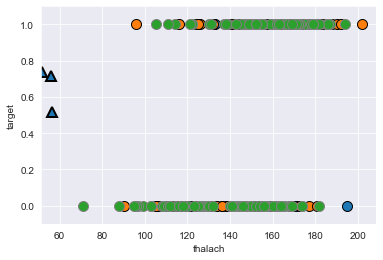

In [140]:
import matplotlib.pyplot as plt
import mglearn

mglearn.discrete_scatter(X.iloc[:, 7], y.iloc[:], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    markers='^', markeredgewidth=2)

plt.xlabel("thalach")
plt.ylabel("target")
plt.show()

- thalach: 최대 심박동 수
- target: 심장병 진단

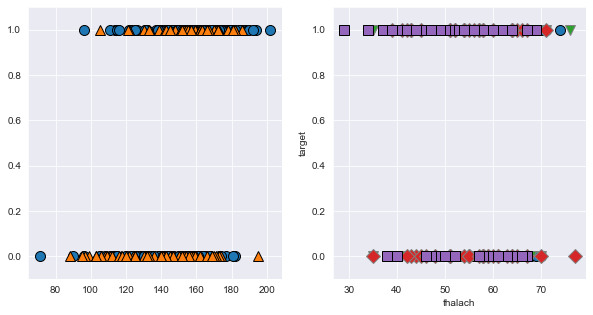

In [46]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 두 개의 클러스터 중심을 사용합니다
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X.iloc[:, 7], y.iloc[:], assignments, ax=axes[0])

# 다섯 개의 클러스터 중심을 사용합니다
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X.iloc[:, 0], y.iloc[:], assignments, ax=axes[1])
plt.xlabel("thalach")
plt.ylabel("target")
plt.show()

In [47]:
# 훈련데이터와 테스트 데이터
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2,random_state = 42)
print(X_train)
print(X_test)
print(y_train)
print(y_test)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
132   42    1   1       120   295    0        1      162      0        0   
202   58    1   0       150   270    0        0      111      1        0   
196   46    1   2       150   231    0        1      147      0        3   
75    55    0   1       135   250    0        0      161      0        1   
176   60    1   0       117   230    1        1      160      1        1   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
188   50    1   2       140   233    0        1      163      0        0   
71    51    1   2        94   227    0        1      154      1        0   
106   69    1   3       160   234    1        0      131      0        0   
270   46    1   0       120   249    0        0      144      0        0   
102   63    0   1       140   195    0        1      179      0        0   

     slope  ca  thal  
132      2   0     2  
202      2   0     3  
196      1   0    

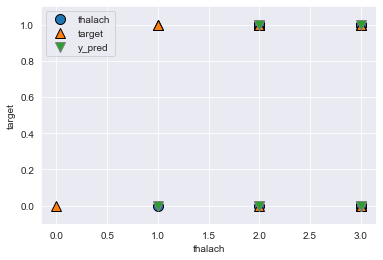

In [48]:
y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(X_test)

mglearn.discrete_scatter(X_test.iloc[:, -1], y_test.iloc[:], y_pred)
plt.legend(["thalach", "target", "y_pred"], loc='best')
plt.xlabel("thalach")
plt.ylabel("target")
plt.show() 

Text(0, 0.5, 'target')

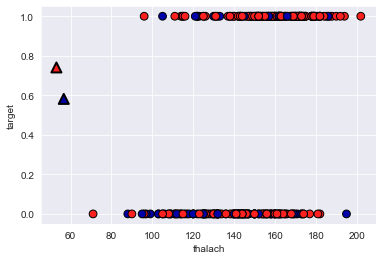

In [49]:
# 두 개의 클러스터로 데이터에 KMeans 알고리즘을 적용합니다
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# 클러스터 할당과 클러스터 중심을 표시합니다
plt.scatter(X.iloc[:, 7], y[:], c=y_pred, cmap=mglearn.cm2, s=60, edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker='^', c=[mglearn.cm2(0), mglearn.cm2(1)], s=100, linewidth=2, edgecolors='k')
plt.xlabel("thalach")
plt.ylabel("target")

# c는 색상을 의미하며, s는 점 크기, marker는 표시할 마크 종류
# cmap은 palette
# edgecolors는 테두리색, linewidth는 두께

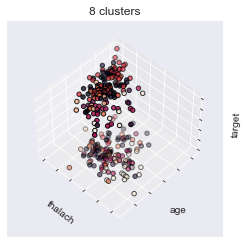

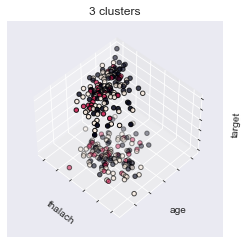

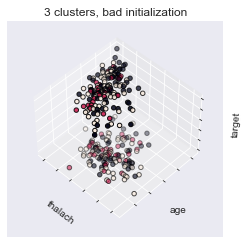

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits

from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(42)

estimators = [('k_means_8', KMeans(n_clusters=8)),
              ('k_means_3', KMeans(n_clusters=3)),
              ('k_means_bad_init', KMeans(n_clusters=3, n_init=1,
                                               init='random'))]

fignum = 1
titles = ['8 clusters', '3 clusters', '3 clusters, bad initialization']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X.iloc[:, 7], X.iloc[:, 0], y.iloc[:],
               c=labels.astype(float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([]) # 3차원 시각화 이기 때문에 w_x를 붙임
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('thalach')
    ax.set_ylabel('age')
    ax.set_zlabel('target')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

- thalach: 최대 심박동 수
- target: 심장병 진단
- age: 나이

Text(0, 0.5, 'Cluster distance')

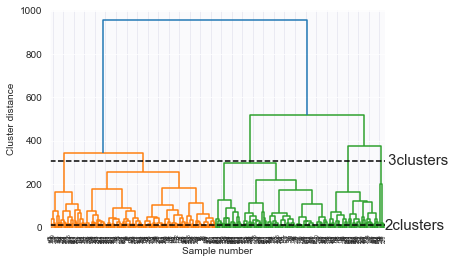

In [51]:
# SciPy에서 ward 군집 함수와 덴드로그램 함수를 임포트합니다
from scipy.cluster.hierarchy import dendrogram, ward

# 데이터 배열 X 에 ward 함수를 적용합니다
# SciPy의 ward 함수는 병합 군집을 수행할 때 생성된
# 거리 정보가 담긴 배열을 리턴합니다
linkage_array = ward(X)
# 클러스터 간의 거리 정보가 담긴 linkage_array를 사용해 덴드로그램을 그립니다
dendrogram(linkage_array)

# 두 개와 세 개의 클러스터를 구분하는 커트라인을 표시합니다
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [9.66, 9.66], '--', c='k')
ax.plot(bounds, [305.25, 305.25], '--', c='k')

ax.text(bounds[1], 9.66, '2clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 305.25, ' 3clusters', va='center', fontdict={'size': 15})
plt.xlabel("Sample number")
plt.ylabel("Cluster distance")

# np.percentile(ward(X), 25) == 9.66 
# np.percentile(ward(X), 75) == 305.25

In [52]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)
print("클러스터 레이블:\n", clusters)

클러스터 레이블:
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


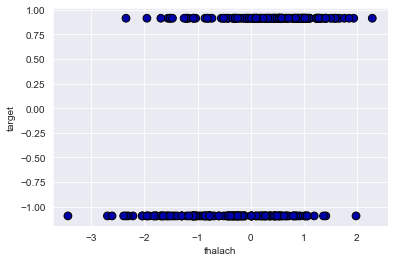

In [53]:
from sklearn.preprocessing import StandardScaler 
from sklearn.impute import SimpleImputer

# 평균이 0, 분산이 1이 되도록 데이터의 스케일을 조정합니다
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

y=np.array(y)
y=y.reshape(-1,1)
imp=SimpleImputer()
imp.fit_transform(y)
scaler.fit(y)
y_scaled=scaler.transform(y)


dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)
# 클러스터 할당을 표시합니다
plt.scatter(X_scaled[:, 7], y_scaled[:, 0], c=clusters, cmap=mglearn.cm2, s=60, edgecolors='black')
plt.xlabel("thalach")
plt.ylabel("target")
plt.show()

In [54]:
X=df_heart.drop('target', axis=1)
y=df_heart.target

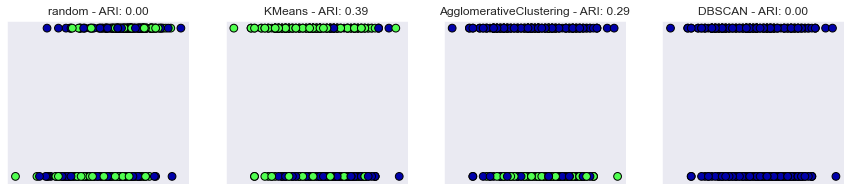

In [55]:
from sklearn.metrics.cluster import adjusted_rand_score
import sklearn.cluster
from sklearn.cluster import AgglomerativeClustering

# 평균이 0, 분산이 1이 되도록 데이터의 스케일을 조정합니다
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 4, figsize=(15, 3),
                         subplot_kw={'xticks': (), 'yticks': ()})

# 사용할 알고리즘 모델을 리스트로 만듭니다
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2),
              DBSCAN()]

# 비교를 위해 무작위로 클러스터 할당을 합니다
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

# 무작위 할당한 클러스터를 그립니다
axes[0].scatter(X_scaled[:, 7], y_scaled[:, 0], c=random_clusters,
                cmap=mglearn.cm3, s=60, edgecolors='black')
axes[0].set_title("random - ARI: {:.2f}".format(
        adjusted_rand_score(y, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms):
    # 클러스터 할당과 클러스터 중심을 그립니다
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], y_scaled[:, 0], c=clusters,
               cmap=mglearn.cm3, s=60, edgecolors='black')
    ax.set_title("{} - ARI: {:.2f}".format(algorithm.__class__.__name__,
                                           adjusted_rand_score(y, clusters)))